# QPSK

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math as mt

pi = np.pi

In [129]:
def bpsk(signal,carrier):
    arr = []
    for i in signal:
        if i == 1:
            for j in range(100):
                arr.append(1)
        else:
            for j in range(100):
                arr.append(-1)
    return arr*carrier

def demod_QPSK(signal,carrier):
    recovered = signal*carrier
    recovered = np.real(recovered)
    demod = []
    for i,j in enumerate(recovered):
        # print(i , type(i))
        if j > 0:
            demod.append(1)
        elif j < 0:
            demod.append(0)
        else:
            if(j >recovered[i-1]):
                demod.append(1)
            else:
                demod.append(0)
    return demod

def ER(original, received):
    error = 0
    for i in range(len(original)):
        if original[i] != received[i]:
            error += 1
    return error / len(original)


QPSK Modulation


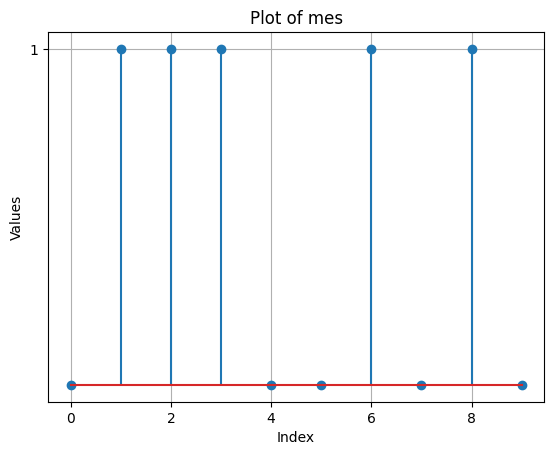

In [130]:
m_len = 2000
mes = [random.choice([0,1]) for i in range(m_len)]

plt.stem(mes[0:10])
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Plot of mes')
plt.yticks([max(mes)])
plt.grid(True)  # Set the y-axis ticks to only the maximum value
plt.show()


In [131]:
#Splitting into odd and even bit streams
odd = [mes[i] for i in range(m_len) if i % 2 == 0] # For odd sequencing
even = [mes[i] for i in range(m_len) if i % 2 != 0] # For even sequencing

#carrier signals
fc = 2                      #carrier frequency
t = np.arange(0, 1000 , 0.01)   
x1 = np.sin(2 * pi * fc * t)
x2 = np.cos(2 * pi * fc * t)
odd_bpsk = bpsk(odd,x1) #BPSK for the odd sequence
even_bpsk = bpsk(even,x2) #BPSK for the even sequence

qpsk = even_bpsk + 1j*odd_bpsk #QPSK signal



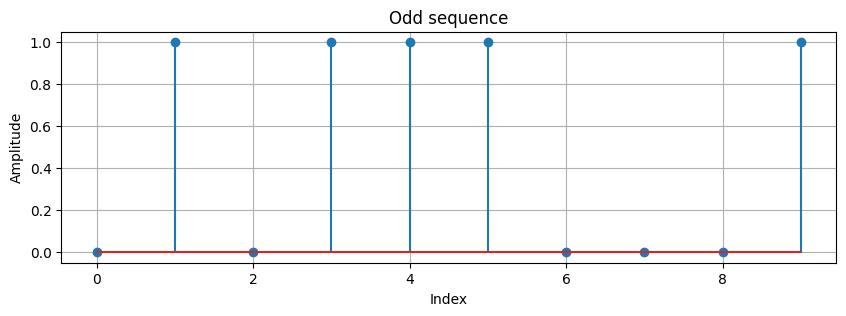

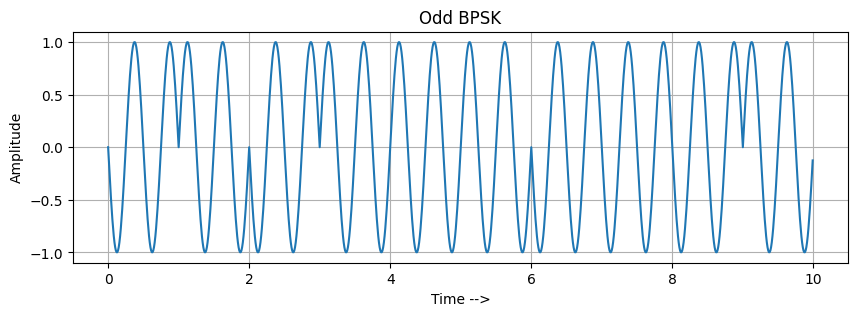

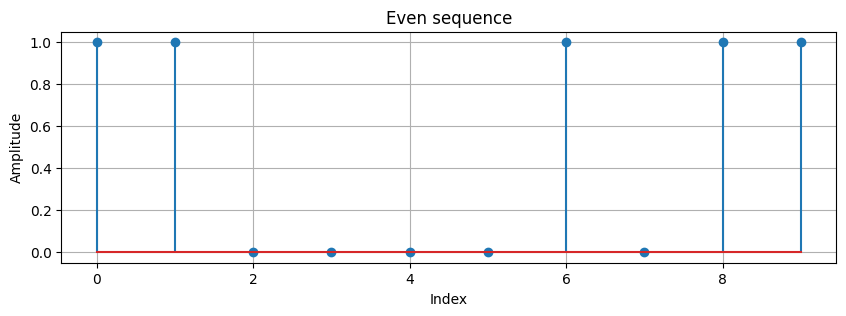

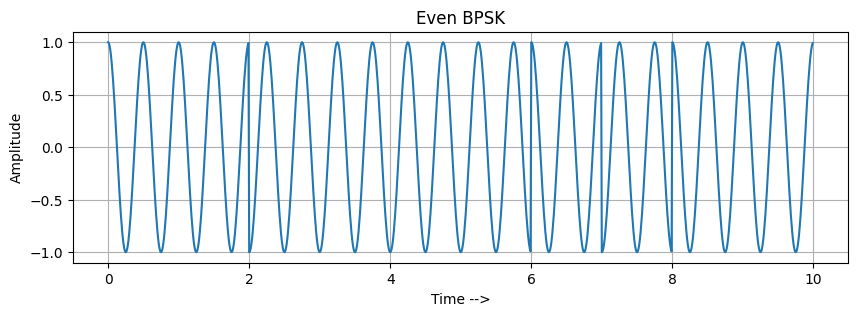

In [132]:
plt.figure(figsize=(10,3))
plt.stem(odd[:10])
plt.title('Odd sequence')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.plot(t[0:1000], odd_bpsk[0:1000])
plt.title('Odd BPSK')
plt.xlabel('Time -->')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.stem(even[:10])
plt.title('Even sequence')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.plot(t[0:1000], even_bpsk[0:1000])
plt.title('Even BPSK')
plt.xlabel('Time -->')
plt.ylabel('Amplitude')
plt.grid(True)

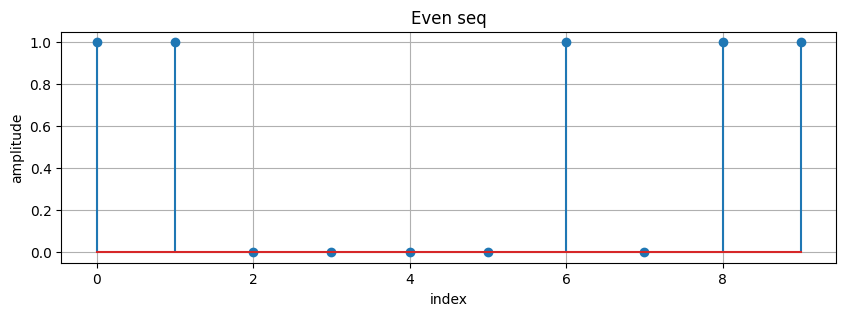

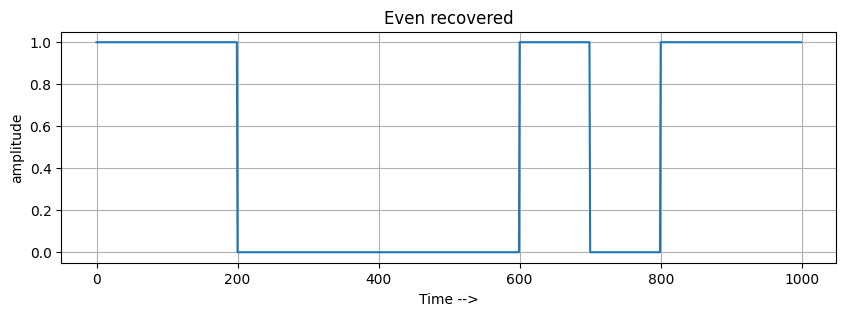

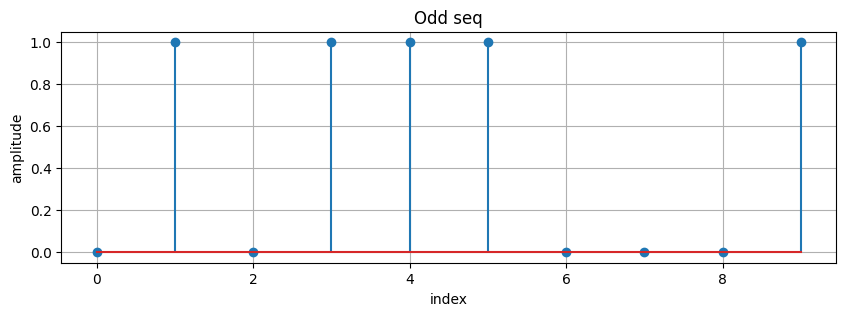

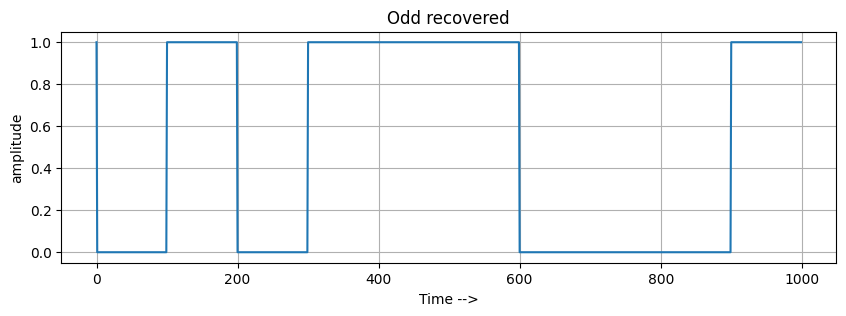

In [133]:
rec_even = demod_QPSK(qpsk,x2)
rec_odd = demod_QPSK(qpsk,x1*(-1j))

plt.figure(figsize=(10,3))
plt.stem(even[0:10])
plt.title('Even seq')
plt.xlabel('index')
plt.ylabel('amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.plot(rec_even[0:1000])
plt.title('Even recovered')
plt.xlabel('Time -->')
plt.ylabel('amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.stem(odd[0:10])
plt.title('Odd seq')
plt.xlabel('index')
plt.ylabel('amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.plot(rec_odd[0:1000])
plt.title('Odd recovered')
plt.xlabel('Time -->')
plt.ylabel('amplitude')
plt.grid(True)

In [134]:
# Add complex Gaussian noise at the channel
noise = np.random.normal(0, 1, len(qpsk)) + 1j * np.random.normal(0, 2, len(qpsk))
qpsk_with_noise = qpsk + noise


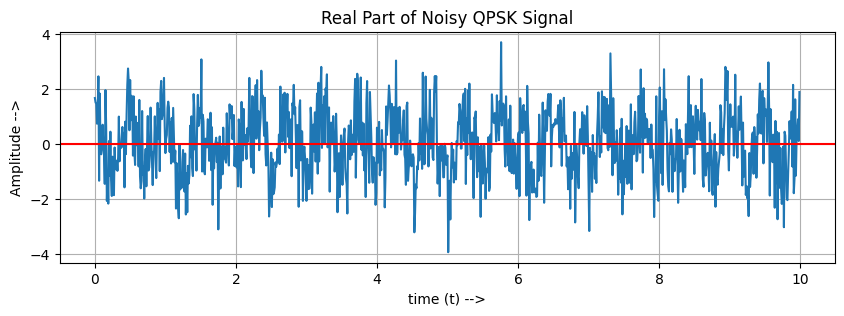

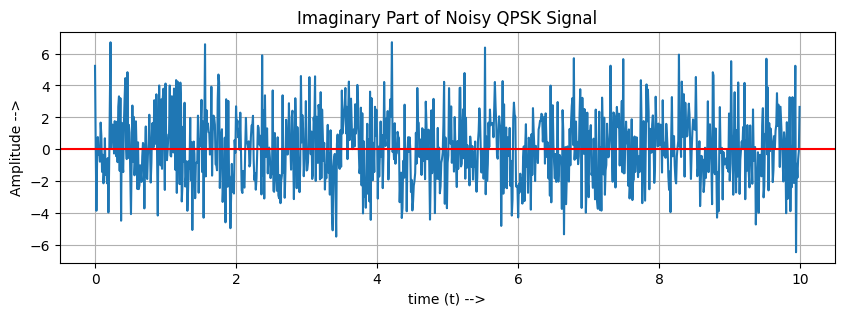

In [135]:
# Plotting the real part of the noisy QPSK signal
plt.figure(figsize=(10, 3))
plt.plot(t[0:1000], np.real(qpsk_with_noise)[0:1000])
plt.grid(True)
plt.axhline(0, color='red')
plt.title("Real Part of Noisy QPSK Signal")
plt.xlabel("time (t) -->")
plt.ylabel("Amplitude -->")
plt.show()

# Plotting the imaginary part of the noisy QPSK signal
plt.figure(figsize=(10, 3))
plt.plot(t[0:1000], np.imag(qpsk_with_noise)[0:1000])
plt.grid(True)
plt.axhline(0, color='red')
plt.title("Imaginary Part of Noisy QPSK Signal")
plt.xlabel("time (t) -->")
plt.ylabel("Amplitude -->")
plt.show()

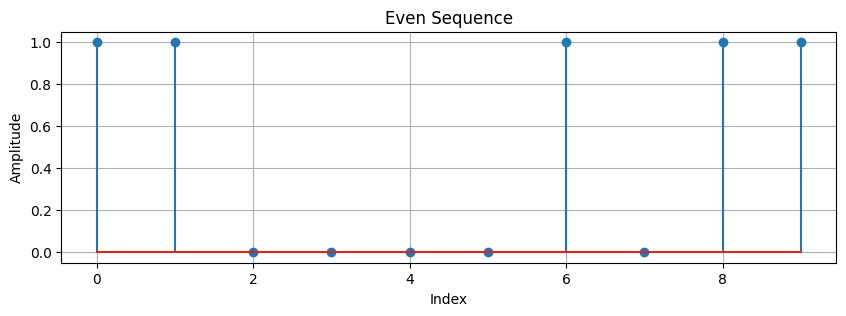

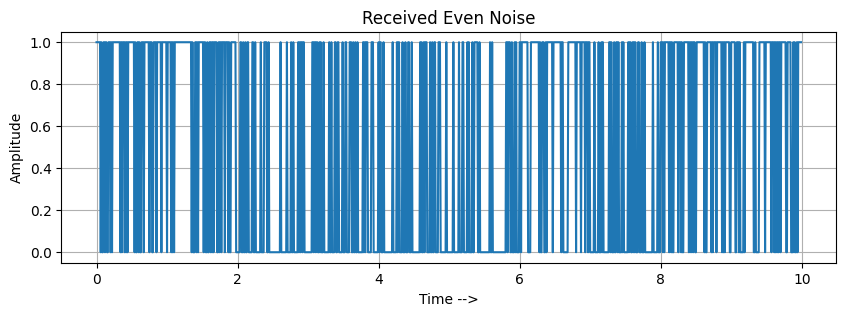

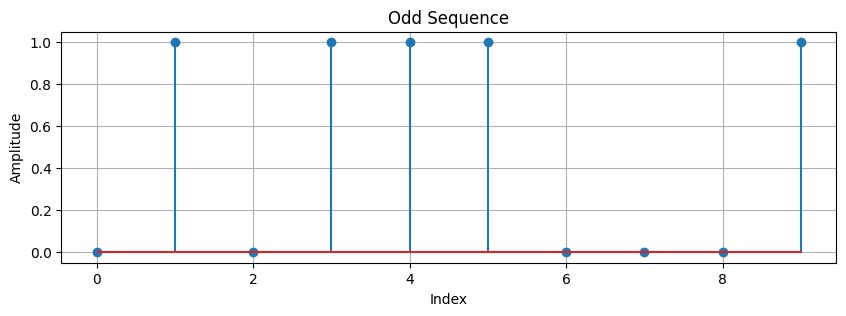

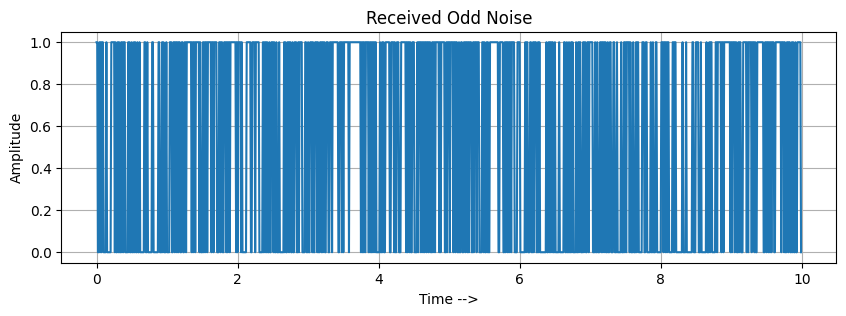

In [136]:
r_even_noise = demod_QPSK(qpsk_with_noise,x2)
r_odd_noise = demod_QPSK(qpsk_with_noise,x1*(-1j))

plt.figure(figsize=(10,3))
plt.stem(even[0:10])
plt.title('Even Sequence')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.plot(t[:1000], r_even_noise[0:1000])
plt.title('Received Even Noise')
plt.xlabel('Time -->')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.stem(odd[0:10])
plt.title('Odd Sequence')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.plot(t[:1000] ,r_odd_noise[0:1000])
plt.title('Received Odd Noise')
plt.xlabel('Time -->')
plt.ylabel('Amplitude')
plt.grid(True)


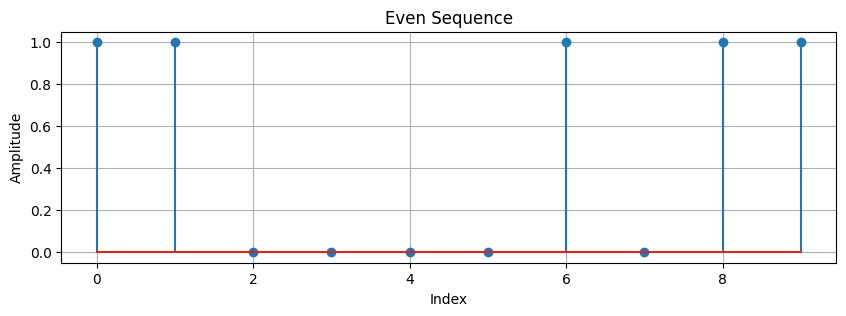

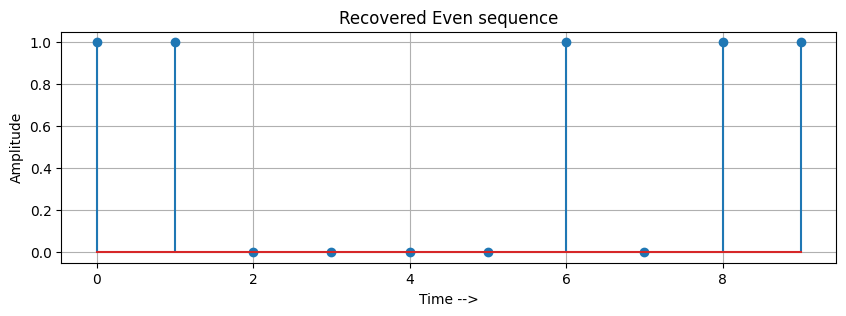

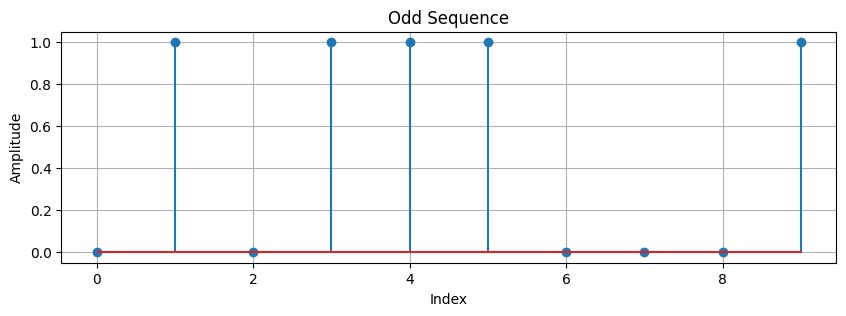

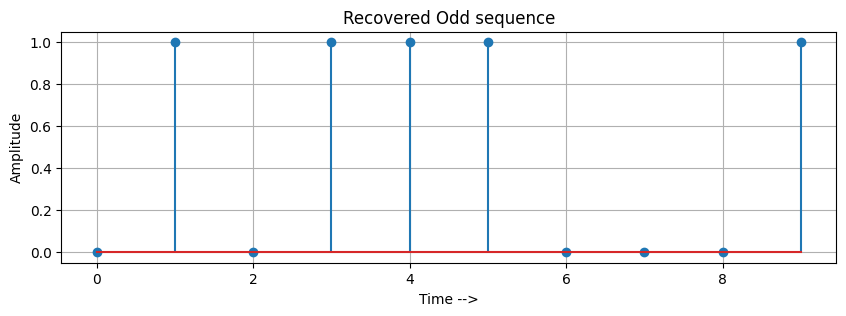

In [142]:
#Removing noise and sending Signal

recovered_even = []
for i in range(1000):
    np.sum(r_even_noise[i*100:(i+1)*100])
    if np.sum(r_even_noise[i*100:(i+1)*100]) > 50:
        recovered_even.append(1)
    else:
        recovered_even.append(0)
        
recovered_odd = []
for i in range(1000):
    np.sum(r_odd_noise[i*100:(i+1)*100])
    if np.sum(r_odd_noise[i*100:(i+1)*100]) > 50:
        recovered_odd.append(1)
    else:
        recovered_odd.append(0)

plt.figure(figsize=(10,3))
plt.stem(even[0:10])
plt.title('Even Sequence')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.stem(recovered_even[0:10])
plt.title('Recovered Even sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.stem(odd[0:10])
plt.title('Odd Sequence')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(10,3))
plt.stem(recovered_odd[:10])
plt.title('Recovered Odd sequence')
plt.xlabel('Time -->')
plt.ylabel('Amplitude')
plt.grid(True)

In [138]:
# The BIT Error Rate for the even and odd sequences
ber_even = ER(even, recovered_even)
ber_odd = ER(odd, recovered_odd)

ber_even,ber_odd

(0.0, 0.005)

In [139]:
new_m = []
for i in range(1000):
    new_m.append(recovered_even[i])
    new_m.append(recovered_odd[i])

In [140]:
# Taking two Bits at a time as a symbol in the message signal

symbol = []
for i in range(0,2000,2):
    if new_m[i] == 1 and new_m[i+1] == 1:
        symbol.append(1)
    elif new_m[i] == 0 and new_m[i+1] == 1:
        symbol.append(3)
    elif new_m[i] == 0 and new_m[i+1] == 0:
        symbol.append(2)
    else:
        symbol.append(4)

sym = []
for i in range(0,2000,2):
    if mes[i] == 1 and mes[i+1] == 1:
        sym.append(1)
    elif mes[i] == 0 and mes[i+1] == 1:
        sym.append(3)
    elif mes[i] == 0 and mes[i+1] == 0:
        sym.append(2)
    else:
        sym.append(4)


In [141]:
SER = ER(sym,symbol)
SER

0.502